# Influence of Artist Popularity Globally

Spotify music platform provides a weekly artist information to show the trending artist globally. We need to analyse what keeps an artist above others in music ranking based on the period under review. June 2025

# Areas of Focus
* Which Country, continent or city dominates the music World?
* Does Country population affect artist popularity?
* Does Country GDP influence their artist popularity?
* What are the observation and Recommendation

# Data Import and cleaning
* Extract the Artist data from the CSV file,
* Scrap the worldometers.info website to extract the world population and country GDP,
* Combine the three dataset for exploration and analysis

In [1]:
#Import relevant libraries
#import os
import pandas as pd                 #For dataframe
import matplotlib.pyplot as plt     #for plotting visuals
import seaborn as sns               #for plots
import requests                     #For data extraction from weblink
from bs4 import BeautifulSoup       #For data extraction from weblink

# Load artist CSV
artist_df = pd.read_csv("/kaggle/input/weekly-top-global-artists-june-2025/World_Artist_Data.csv")  # The CSV File Path

# Clean column names if needed
artist_df.columns = artist_df.columns.str.strip().str.replace(' ', '_')
artist_df.head()

,Artist,Country,City,Artist_type,Rank,Continent
0,Taylor Swift,United States,New York City,Solo Artist,1,North America
1,Bad Bunny,United States,Miami,Solo Artist,2,North America
2,The Weeknd,Canada,Toronto,Solo Artist,3,North America
3,Drake,Canada,Toronto,Solo Artist,4,North America
4,Morgan Wallen,United States,Tennessee,Solo Artist,5,North America


# Import the World Population and Countries GDP 
The Each Country Population and the Gross Domestic Product (GDP) is extracted from https://www.worldometers.info/ and then combined with the initial CSV data uploaded to the dataframe

In [2]:
from io import StringIO  # <-- Import this to wrap raw HTML strings

# Scrape population data
pop_url = "https://www.worldometers.info/world-population/population-by-country/"
pop_html = requests.get(pop_url).text
pop_soup = BeautifulSoup(pop_html, "html.parser")
pop_table = pop_soup.find("table")

# Wrap the table string in StringIO to avoid FutureWarning
pop_df = pd.read_html(StringIO(str(pop_table)))[0]
pop_df = pop_df[['Country (or dependency)', 'Population (2025)']]  # Use available year column
pop_df.columns = ['Country', 'Population']

print(pop_df.columns)
pop_df.head()

Index(['Country', 'Population'], dtype='object')


,Country,Population
0,India,1463865525
1,China,1416096094
2,United States,347275807
3,Indonesia,285721236
4,Pakistan,255219554


In [3]:
# Scrape GDP Data
gdp_url = "https://www.worldometers.info/gdp/gdp-by-country/"
gdp_html = requests.get(gdp_url).text
gdp_soup = BeautifulSoup(gdp_html, "html.parser")
gdp_table = gdp_soup.find("table")

# Wrap the table string in StringIO to avoid FutureWarning
gdp_df = pd.read_html(StringIO(str(gdp_table)))[0]
gdp_df = gdp_df[['Country', 'GDP (nominal, 2023)']]
gdp_df.columns = ['Country', 'GDP']

gdp_df.head()

,Country,GDP
0,United States,"$27,720,700,000,000"
1,China,"$17,794,800,000,000"
2,Germany,"$4,525,700,000,000"
3,Japan,"$4,204,490,000,000"
4,India,"$3,567,550,000,000"


In [4]:
# --- Merge all data ---
# Standardise country names and create the country population and gdp column in the merged df
artist_df['Country'] = artist_df['Country'].str.strip()
pop_df['Country'] = pop_df['Country'].str.strip()
gdp_df['Country'] = gdp_df['Country'].str.strip()

# Merge artist data with population and GDP
merged_df = artist_df.merge(pop_df, on='Country', how='left')
merged_df = merged_df.merge(gdp_df, on='Country', how='left')

merged_df.head()

,Artist,Country,City,Artist_type,Rank,Continent,Population,GDP
0,Taylor Swift,United States,New York City,Solo Artist,1,North America,347275807,"$27,720,700,000,000"
1,Bad Bunny,United States,Miami,Solo Artist,2,North America,347275807,"$27,720,700,000,000"
2,The Weeknd,Canada,Toronto,Solo Artist,3,North America,40126723,"$2,142,470,000,000"
3,Drake,Canada,Toronto,Solo Artist,4,North America,40126723,"$2,142,470,000,000"
4,Morgan Wallen,United States,Tennessee,Solo Artist,5,North America,347275807,"$27,720,700,000,000"


# Visualisation and Analysis
We will plot somme charts to discover some insights

# Which Country, City or Continent dominates

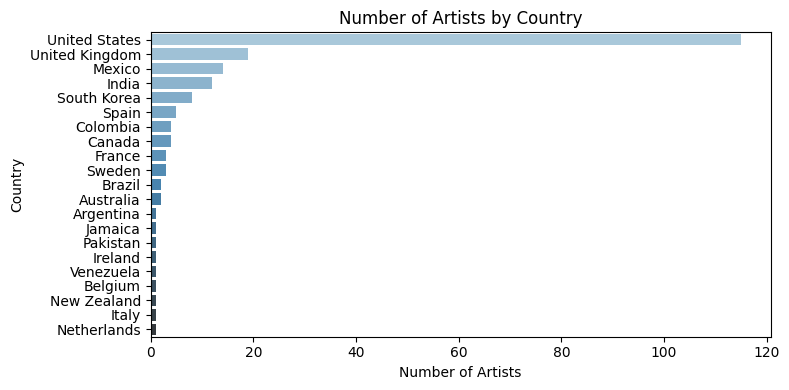

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the count of artists per country
country_counts = artist_df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

# Plot using hue and remove the legend after
plt.figure(figsize=(8, 4))
ax = sns.barplot(
    data=country_counts,
    x='Count',
    y='Country',
    hue='Country',       # Assigning hue for color palette
    palette='Blues_d',
    dodge=False
)

# Remove legend
ax.legend_.remove()

plt.title("Number of Artists by Country")
plt.xlabel("Number of Artists")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

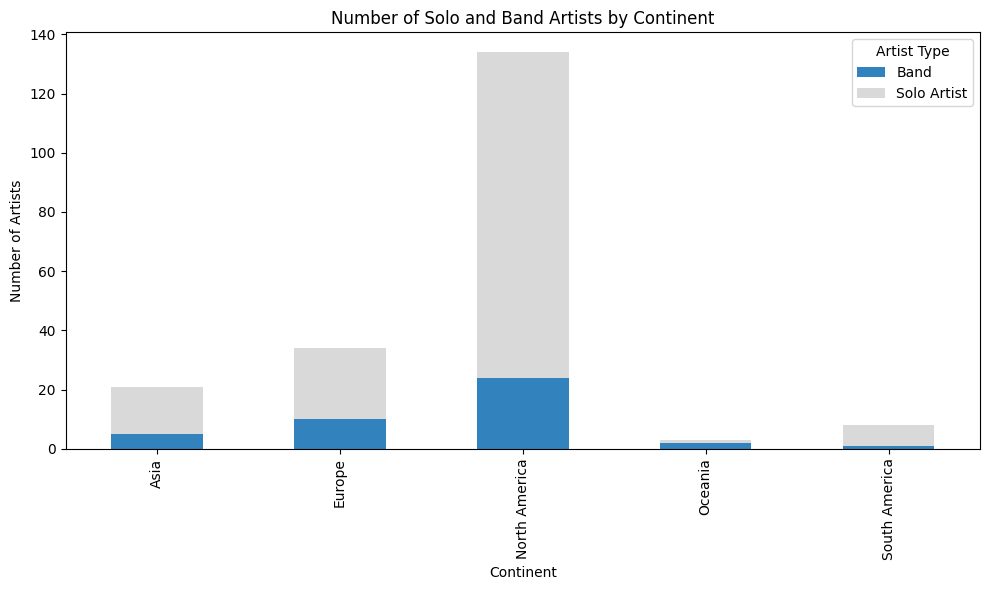

In [6]:
#. Regional or Continent Analysis
# -------------------
import pandas as pd
import matplotlib.pyplot as plt

# Group and count the number of artists by continent and artist type
continent_artist_counts = artist_df.groupby(['Continent', 'Artist_type']).size().unstack(fill_value=0)

# Plot a stacked bar chart
ax = continent_artist_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='tab20c'
)

# Chart labels and legend
plt.title("Number of Solo and Band Artists by Continent")
plt.xlabel("Continent")
plt.ylabel("Number of Artists")
plt.legend(title="Artist Type", loc='upper right')
plt.tight_layout()
plt.show()

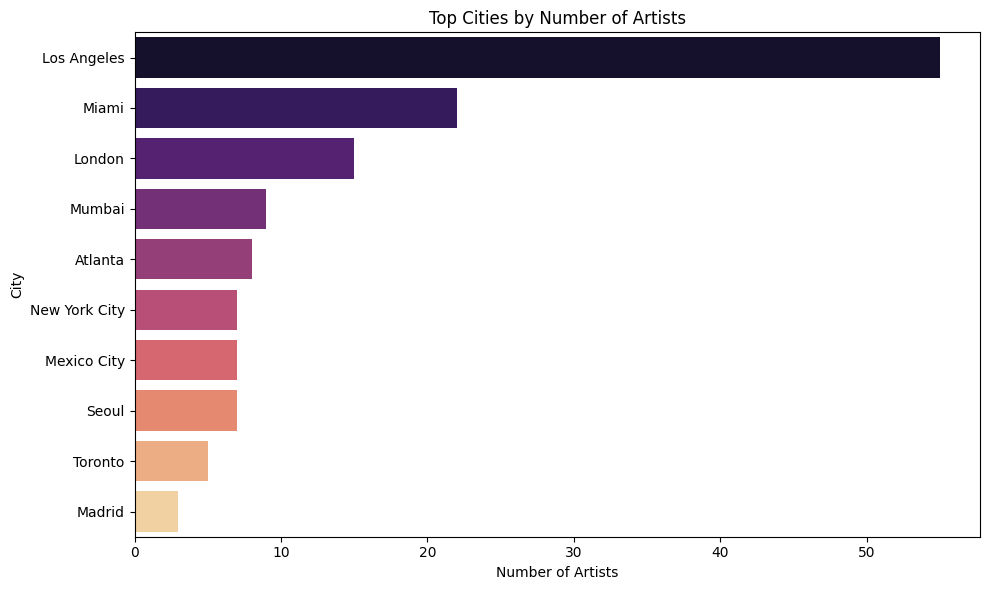

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the count of artists per city for top 10 cities
city_counts = artist_df['City'].value_counts().head(10).reset_index()
city_counts.columns = ['City', 'Count']

# Plot without hue to avoid legend issues
plt.figure(figsize=(10, 6))
sns.barplot(
    data=city_counts,
    x='Count',
    y='City',
    palette='magma'
)

plt.title("Top Cities by Number of Artists")
plt.xlabel("Number of Artists")
plt.ylabel("City")
plt.tight_layout()
plt.show()


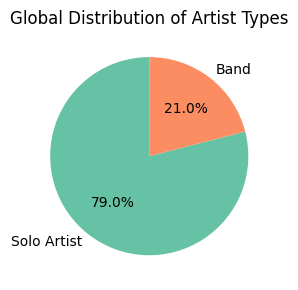

In [8]:
# Using Pie Chart to see the proportion of the Global Artist Type Distribution
plt.figure(figsize=(3,3))
artist_df['Artist_type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66c2a5','#fc8d62'])
plt.title("Global Distribution of Artist Types")
plt.ylabel('')
plt.tight_layout()
plt.show()

In [9]:
# Group by Country and Artist_type and count the number of artists
solo_band_counts = artist_df.groupby(['Country', 'Artist_type']).size().unstack(fill_value=0)

# Display the table
print("Total Number of Solo and Band Artists per Country:")
print(solo_band_counts)


Total Number of Solo and Band Artists per Country:
Artist_type     Band  Solo Artist
Country                          
Argentina          0            1
Australia          2            0
Belgium            0            1
Brazil             1            1
Canada             0            4
Colombia           0            4
France             0            3
India              1           11
Ireland            0            1
Italy              0            1
Jamaica            1            0
Mexico             3           11
Netherlands        0            1
New Zealand        0            1
Pakistan           0            1
South Korea        4            4
Spain              1            4
Sweden             1            2
United Kingdom     8           11
United States     20           95
Venezuela          0            1


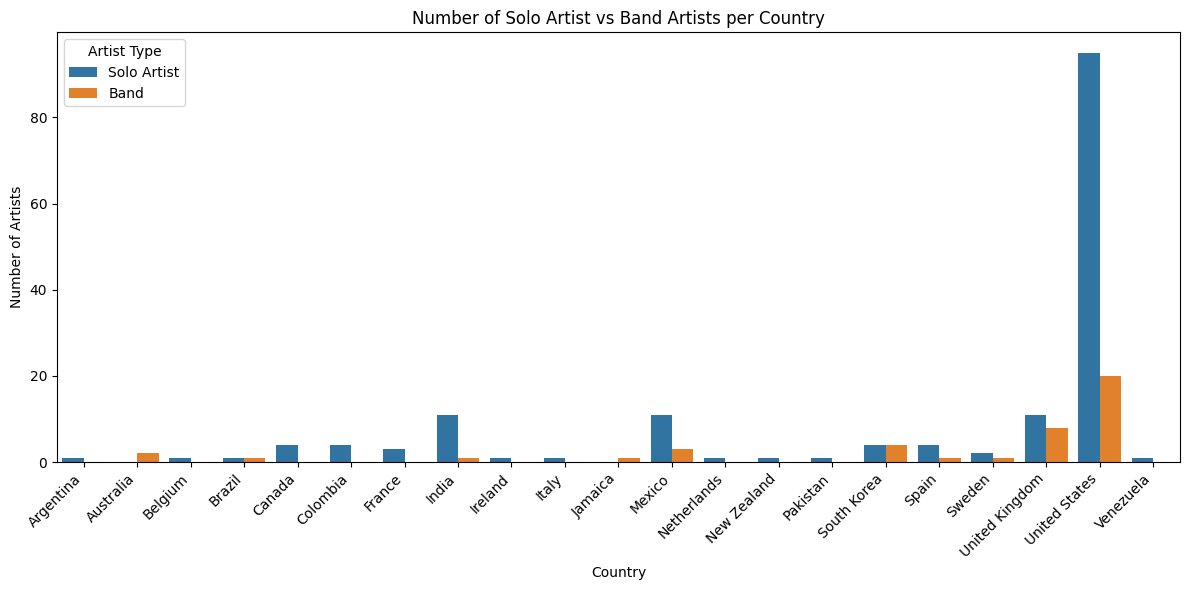

In [10]:
#Bar chart showing the solo and the band aggregation
# Reset index for plotting
solo_band_counts_reset = solo_band_counts.reset_index()

# Melt the DataFrame for seaborn's hue support
melted_df = solo_band_counts_reset.melt(id_vars='Country', 
                                         value_vars=['Solo Artist', 'Band'],
                                         var_name='Artist Type',
                                         value_name='Count')

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='Country', y='Count', hue='Artist Type')
plt.title("Number of Solo Artist vs Band Artists per Country")
plt.xlabel("Country")
plt.ylabel("Number of Artists")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Country Population and GDP influence
Using Correlation heatmap, Scatter plots, Box plots and Bubble plots to reveal the relationships


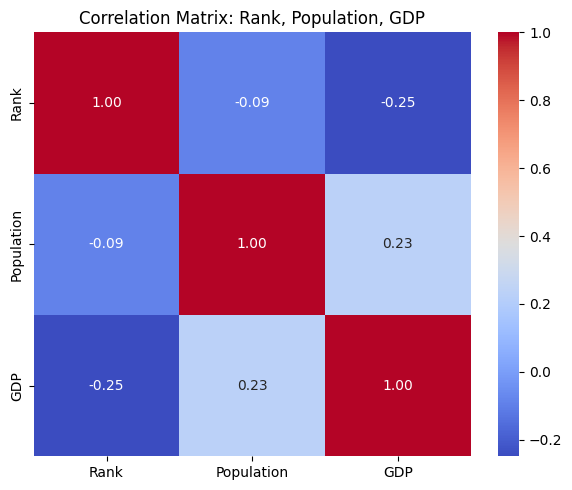

In [11]:
#Influence of GDP and Population on Rank using Correlation Heatmap
# Convert numeric columns
merged_df['Population'] = merged_df['Population'].replace(',', '', regex=True).astype(float)
merged_df['GDP'] = merged_df['GDP'].replace('[\$,]', '', regex=True).astype(float)

# Average Rank per Country
country_stats = merged_df.groupby('Country').agg({
    'Rank': 'mean',
    'Population': 'first',
    'GDP': 'first'
}).dropna()

# Correlation Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(country_stats.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: Rank, Population, GDP")
plt.tight_layout()
plt.show()


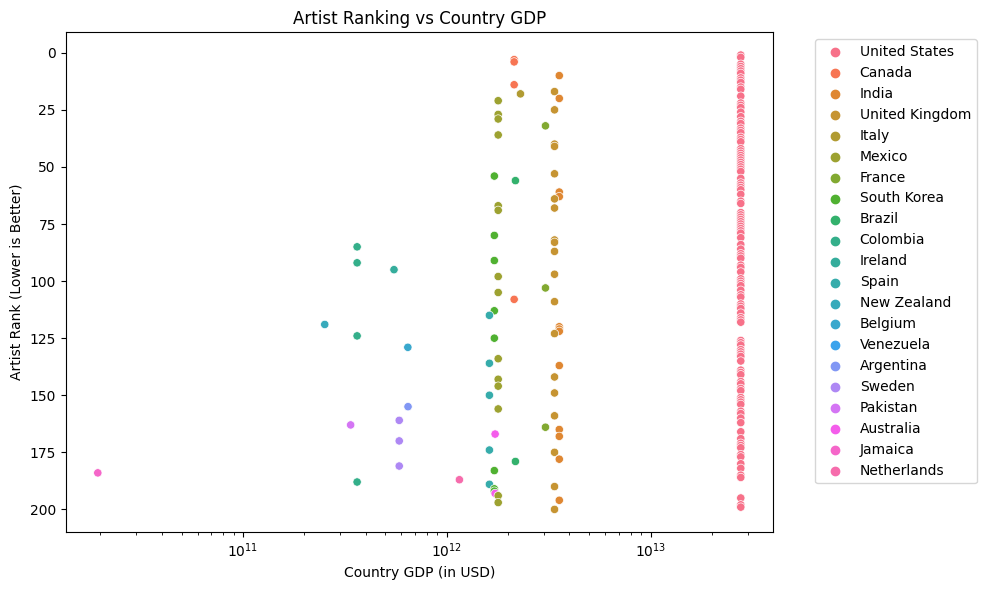

In [12]:
#Scatter Plot: Lets see the GDP vs the artist Rank
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='GDP', y='Rank', hue='Country')
plt.title("Artist Ranking vs Country GDP")
plt.xlabel("Country GDP (in USD)")
plt.ylabel("Artist Rank (Lower is Better)")
plt.xscale('log')  # Handle large range of GDP values
plt.gca().invert_yaxis()  # Better rank = smaller number
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

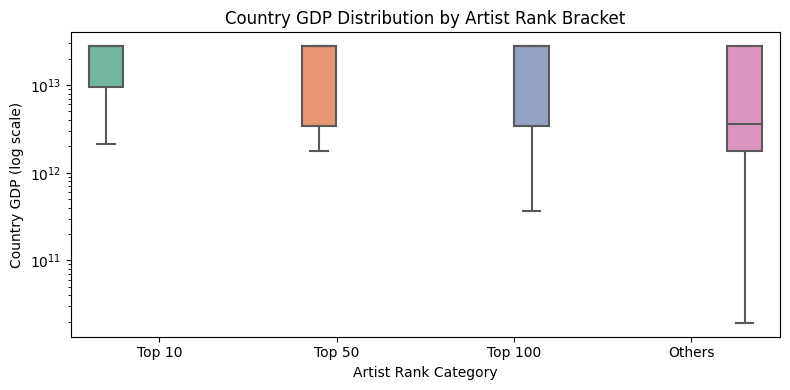

In [13]:
# Create ranking categories to see the distribution using Box plot
def rank_bracket(rank):
    if rank <= 10:
        return 'Top 10'
    elif rank <= 50:
        return 'Top 50'
    elif rank <= 100:
        return 'Top 100'
    else:
        return 'Others'

merged_df['Rank_Bracket'] = merged_df['Rank'].apply(rank_bracket)

plt.figure(figsize=(8, 4))
ax = sns.boxplot(
    data=merged_df,
    x='Rank_Bracket',
    y='GDP',
    hue='Rank_Bracket',   # This is optional since x is already 'Rank_Bracket'
    palette='Set2'
)

plt.yscale('log')
plt.title("Country GDP Distribution by Artist Rank Bracket")
plt.xlabel("Artist Rank Category")
plt.ylabel("Country GDP (log scale)")

# Remove the legend properly
ax.legend_.remove()

plt.tight_layout()
plt.show()



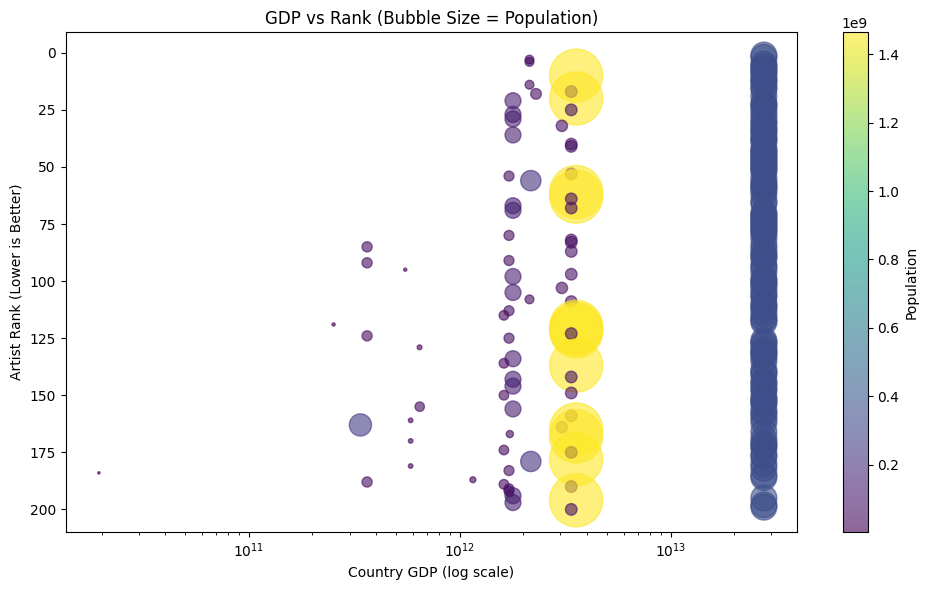

In [14]:
# Bubble Plot: GDP vs Rank, Bubble Size = Population
plt.figure(figsize=(10, 6))
bubble = plt.scatter(
    merged_df['GDP'], 
    merged_df['Rank'], 
    s=merged_df['Population'] / 1e6,  # Scale for visibility
    alpha=0.6,
    c=merged_df['Population'],
    cmap='viridis'
)
plt.xscale('log')
plt.gca().invert_yaxis()
plt.xlabel("Country GDP (log scale)")
plt.ylabel("Artist Rank (Lower is Better)")
plt.title("GDP vs Rank (Bubble Size = Population)")
plt.colorbar(label="Population")
plt.tight_layout()
plt.show()


# Key Observations
**1. Country Dominance in Artist Representation**
* A few countries (like the United States, United Kingdom, and Canada) have the highest number of artists.
* These countries also tend to have higher GDPs, suggesting economic power may influence artist visibility or resources.
  
**2. Solo vs Band by Country**
* Most countries have a higher number of solo artists than bands, especially developed ones.
* Countries like the US and UK have large numbers of both, but solo artists are more dominant globally.
  
**3. GDP & Artist Ranking**
* A negative correlation was observed between GDP and rank (lower rank = better). This means artists from wealthier countries often rank higher.
* However, the correlation wasn’t very strong, suggesting talent or popularity is not only influenced by GDP.
  
**4. Population & Artist Presence**
* Some highly populated countries (e.g., India) have fewer globally ranked artists, implying population alone doesn’t guarantee international or global success.
  
**5. Regional or Continent Analysis**
* North America and Europe dominate artist counts, both solo and band.
* Africa and South America are underrepresented, suggesting fewer globally recognised artists or less music industry infrastructure.




# Recommendations
**1. Support Emerging Regions**
* Platforms and music labels should invest more in Africa, South America, and Southeast Asia, where talent exists but may lack exposure or resources.
  
**2. Encourage Local Development**
* Governments in underrepresented countries should promote local music industries through grants, training, and international partnerships.
  
**3. Focus Beyond GDP**
* While GDP correlates with artist success, labels should look for viral or grassroots talent in low-GDP countries where unique styles are emerging.
  
**4. Balance Solo vs Band Promotion**
* Solo artists are easier to manage and more common, but bands offer collaborative and rich soundscapes — a balanced promotion strategy can diversify global offerings.
  
**5. Explore Genre and Digital Platforms**
* Further research can look at genres per region and how digital platforms (Spotify, YouTube) influence rankings across low-GDP countries.

  **> Thank You. More Information and Insights will be updated.**